In [52]:
import numpy as np
import pandas as pd
import csv
import datetime
import time
import os
import matplotlib.pyplot as plt

In [53]:
def deal_with(data_in):
    collect = {}
    for x in data_in:
        h = int(x[1]) + 8
        if h >= 24:
            h = h - 24
        time = str(h) + ":" + str(x[2]) + ":" + str(x[3])
        # print(time)
        collect[time] = int(x[0])
    return collect

In [54]:
def delete(data_in):
    minus = []
    for x in data_in[0:len(data_in):10]:
        minus.append(x)
    # print("minus", minus)
    return minus

In [55]:
def open_file(path):
    d_temp = []
    with open(path) as csvDataFile:
        csvReader = csv.reader(csvDataFile)
        for row in csvReader:
            d_temp.append(row)
        # minus = delete(d_temp)
        data = deal_with(d_temp)
        # print(data)
        return data

In [56]:
path1 = '/Users/heng/Desktop/3:26 AFTERNOON/38_data_out'
first = open_file(path1)
print(first)
path2 = '/Users/heng/Desktop/3:26 AFTERNOON/47_data_out'
second = open_file(path2)
print(second)
path3 = '/Users/heng/Desktop/3:26 AFTERNOON/48_data_out'
third = open_file(path3)
print(third)
# print(len(list(first)))
# print(len(list(second)))
# print(len(list(third)))
M = min(len(list(first)), len(list(second)), len(list(third)))

{'14:7:57': 20, '14:13:9': 19, '14:18:18': 18, '14:23:30': 18, '14:28:39': 17, '14:33:59': 17, '14:39:2': 16, '14:44:11': 16, '14:49:23': 16, '14:54:32': 15, '14:59:52': 15, '15:5:3': 16, '15:10:13': 14}
{'14:11:18': 16, '14:16:27': 14, '14:21:39': 14, '14:26:48': 13, '14:32:3': 13, '14:37:10': 13, '14:42:20': 13, '14:47:32': 12, '14:52:41': 12, '14:57:52': 12, '15:3:4': 11, '15:8:13': 12, '15:13:25': 11}
{'14:4:44': 21, '14:9:56': 21, '14:15:5': 20, '14:20:16': 19, '14:25:27': 18, '14:30:37': 19, '14:35:49': 18, '14:40:59': 18, '14:46:9': 17, '14:51:21': 17, '14:56:30': 17, '15:6:52': 20, '15:12:2': 16}


In [57]:
df = pd.DataFrame({"38_d": np.array(list(first.values())),
                   "47_d": np.array(list(second.values())),
                   "48_d": np.array(list(third.values()))}, index = np.array(list(first.keys())))
print(df)

          38_d  47_d  48_d
14:7:57     20    16    21
14:13:9     19    14    21
14:18:18    18    14    20
14:23:30    18    13    19
14:28:39    17    13    18
14:33:59    17    13    19
14:39:2     16    13    18
14:44:11    16    12    18
14:49:23    16    12    17
14:54:32    15    12    17
14:59:52    15    11    17
15:5:3      16    12    20
15:10:13    14    11    16


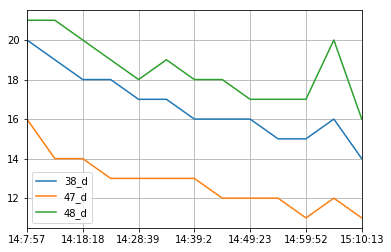

In [58]:
df = df.astype(float)
df.plot()
plt.grid(True)
plt.show()

In [59]:
total_std = []
average = []
for x in range(0, 13):
    row = np.array(df.iloc[x])
    std = row.std()
    avg = row.mean()
    total_std.append(std)
    average.append(avg)
total_std = np.array(total_std)
average = np.array(average)
CV = total_std / average

In [60]:
df = pd.DataFrame({"CV": CV}, index = average)
print(df)

                 CV
19.000000  0.113697
18.000000  0.163551
17.333333  0.143910
16.666667  0.157480
16.000000  0.135015
16.333333  0.152721
15.666667  0.131158
15.333333  0.162681
15.000000  0.144016
14.666667  0.140100
14.333333  0.174031
16.000000  0.204124
13.666667  0.150352


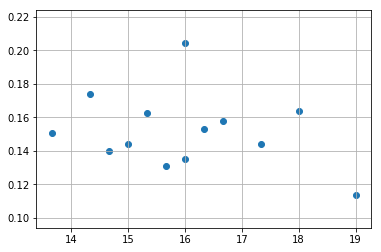

In [68]:
plt.scatter(average, CV)
plt.grid(True)
plt.show()